In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "piemonte"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,1,Piemonte,2,0,2,1,3,0,0,...,0.0,15.0,0.0,0.0,0.00,66.67,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,1,Piemonte,2,0,2,0,2,-1,-1,...,0.0,0.0,0.0,-1.0,0.00,100.00,-inf,0.00,0.00,-33.33
3,2020-02-28T18:00:00,1,Piemonte,7,0,7,4,11,9,9,...,0.0,71.0,0.0,4.0,0.00,63.64,12.68,0.00,0.00,450.00
4,2020-02-29T17:00:00,1,Piemonte,7,0,7,4,11,0,0,...,0.0,81.0,0.0,0.0,0.00,63.64,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2020-12-10T17:00:00,1,Piemonte,4069,310,4379,56728,61107,-2376,974,...,84.0,14418.0,5560.0,-2335.0,7.08,7.17,6.76,17.52,-2.52,-3.74
290,2020-12-11T17:00:00,1,Piemonte,4005,300,4305,55686,59991,-1116,1553,...,96.0,18504.0,7616.0,-1042.0,6.97,7.18,8.39,20.39,-3.23,-1.83
291,2020-12-12T17:00:00,1,Piemonte,3857,304,4161,53700,57861,-2130,1443,...,59.0,18227.0,6562.0,-1986.0,7.31,7.19,7.92,21.99,1.33,-3.55
292,2020-12-13T17:00:00,1,Piemonte,3835,291,4126,51848,55974,-1887,1011,...,36.0,8330.0,4101.0,-1852.0,7.05,7.37,12.14,24.65,-4.28,-3.26


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 528
Nuovi tamponi: 8647.0
Percentuale nuovi positivi/nuovi tamponi: 6.1 %
Nuovi guariti: 3118.0
Nuovi deceduti: 48.0
Variazione positivi ricoverati con sintomi: 21.0
Variazione positivi in terapia intensiva: -13.0
Variazione positivi in isolamento dimiciliare: -2646.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 14, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-15T17:00:00,1,Piemonte,595,40,635,6673,7308,921,1033,...,3.0,14142.0,7607.0,881.0,6.30,8.69,7.30,13.58,21.21,14.42
1,2020-10-16T17:00:00,1,Piemonte,658,43,701,7357,8058,750,821,...,4.0,9707.0,3960.0,684.0,6.13,8.70,8.46,20.73,7.50,10.26
2,2020-10-17T17:00:00,1,Piemonte,701,51,752,8128,8880,822,972,...,2.0,11066.0,4573.0,771.0,6.78,8.47,8.78,21.26,18.60,10.20
3,2020-10-18T17:00:00,1,Piemonte,780,55,835,8998,9833,953,1123,...,2.0,9721.0,6880.0,870.0,6.59,8.49,11.55,16.32,7.84,10.73
4,2020-10-19T17:00:00,1,Piemonte,883,61,944,9663,10607,774,933,...,5.0,9564.0,6128.0,665.0,6.46,8.90,9.76,15.23,10.91,7.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-10T17:00:00,1,Piemonte,4069,310,4379,56728,61107,-2376,974,...,84.0,14418.0,5560.0,-2335.0,7.08,7.17,6.76,17.52,-2.52,-3.74
57,2020-12-11T17:00:00,1,Piemonte,4005,300,4305,55686,59991,-1116,1553,...,96.0,18504.0,7616.0,-1042.0,6.97,7.18,8.39,20.39,-3.23,-1.83
58,2020-12-12T17:00:00,1,Piemonte,3857,304,4161,53700,57861,-2130,1443,...,59.0,18227.0,6562.0,-1986.0,7.31,7.19,7.92,21.99,1.33,-3.55
59,2020-12-13T17:00:00,1,Piemonte,3835,291,4126,51848,55974,-1887,1011,...,36.0,8330.0,4101.0,-1852.0,7.05,7.37,12.14,24.65,-4.28,-3.26


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

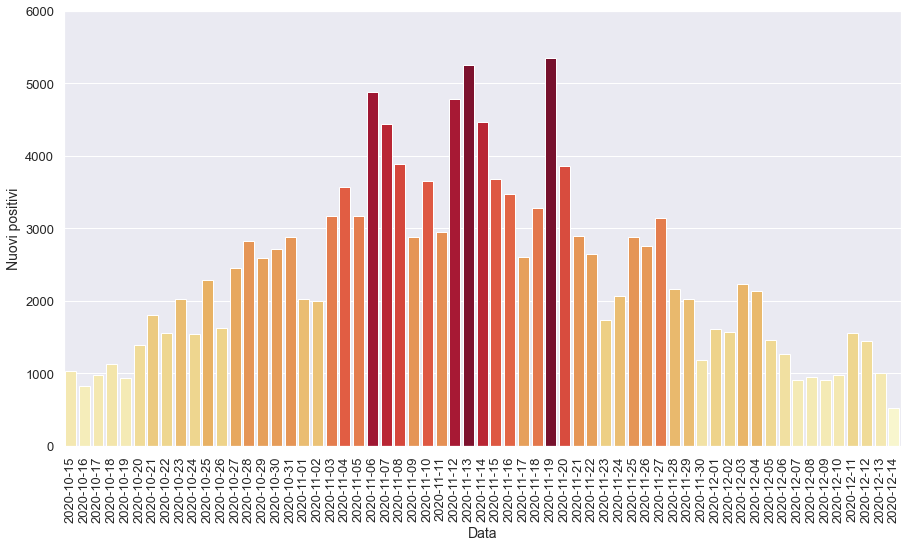

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

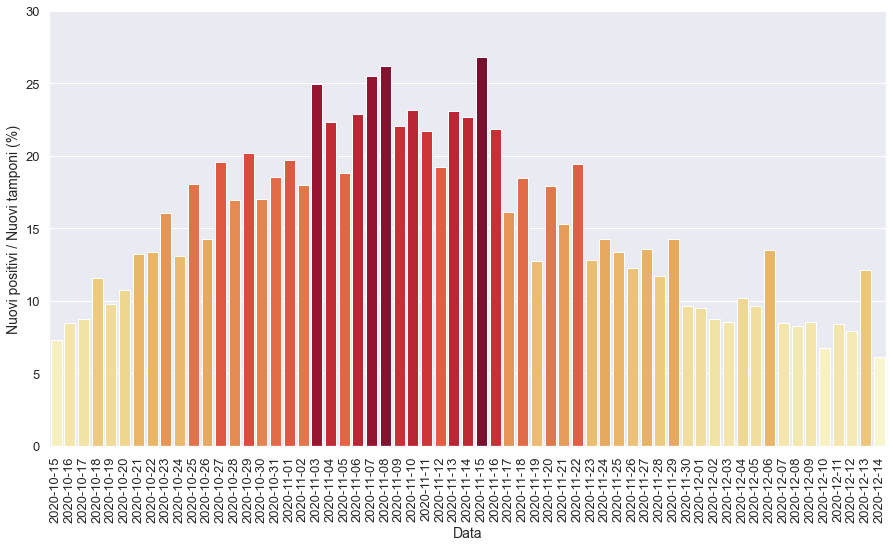

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

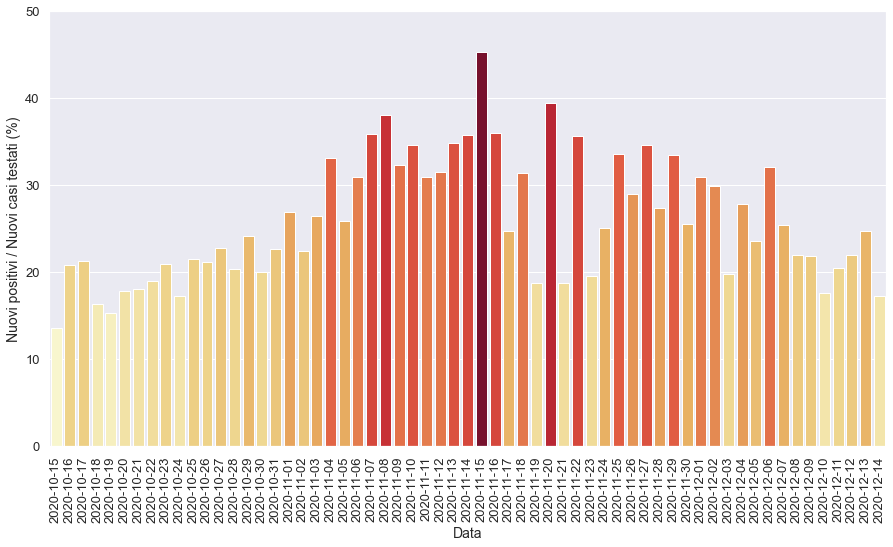

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

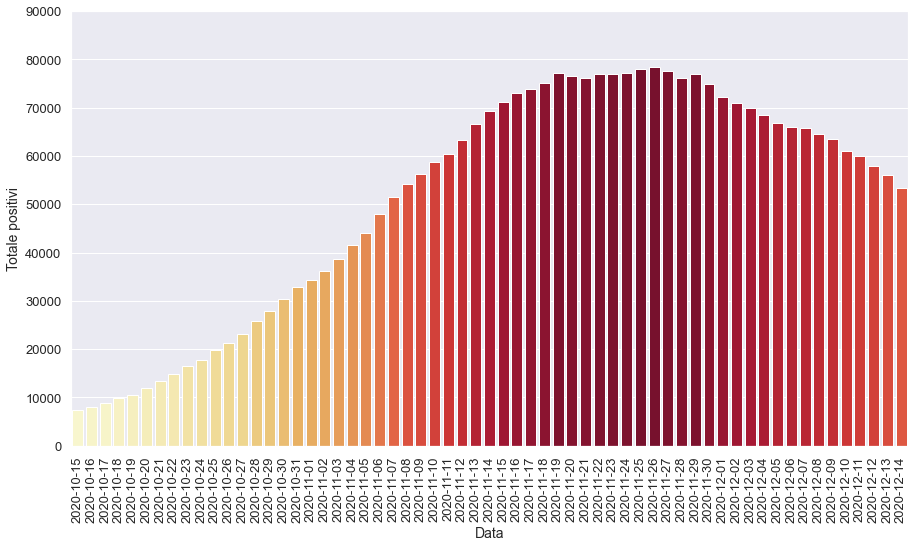

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

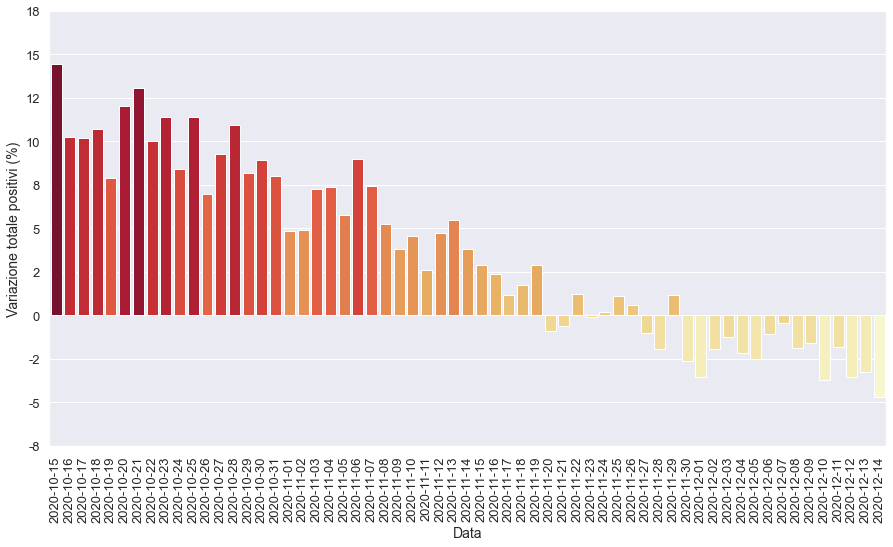

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

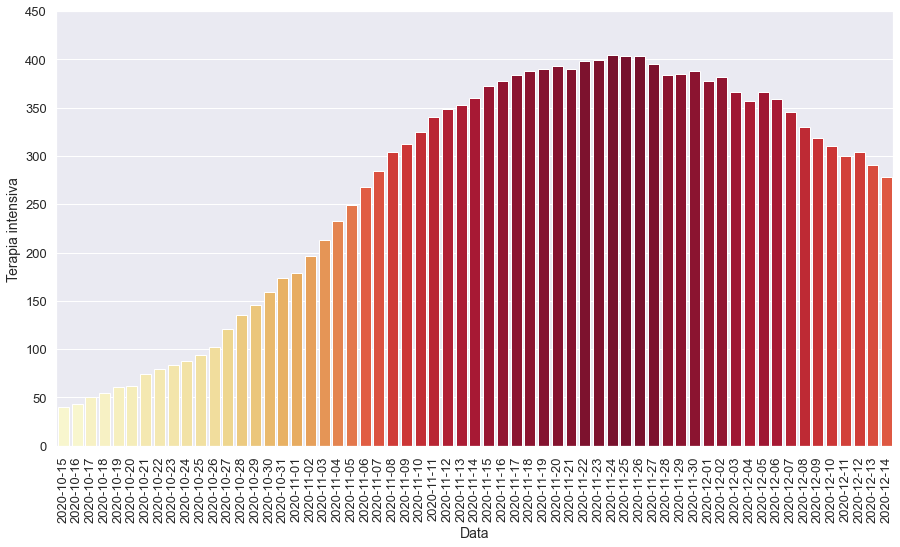

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

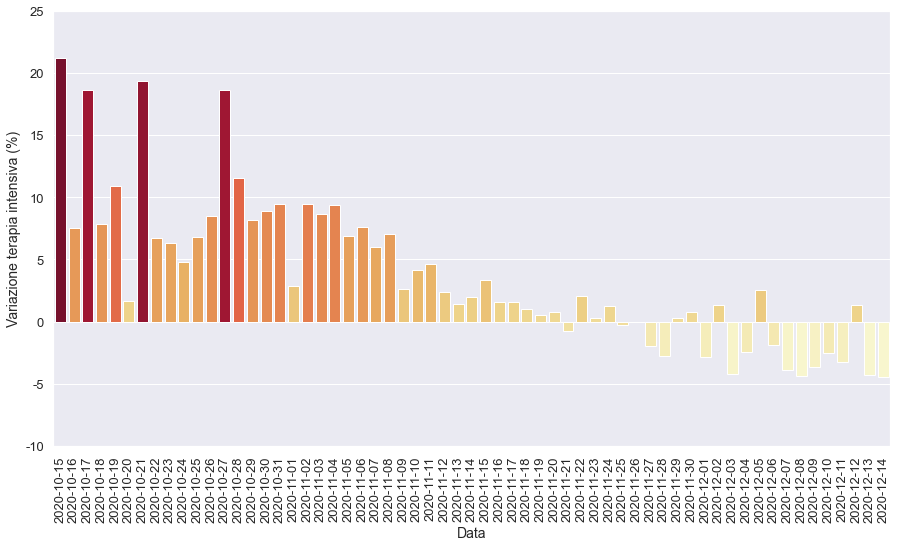

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

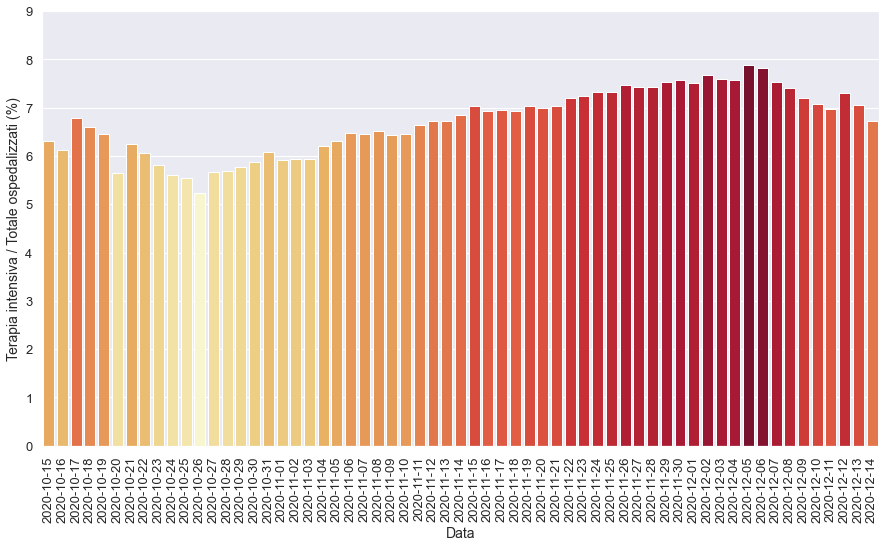

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

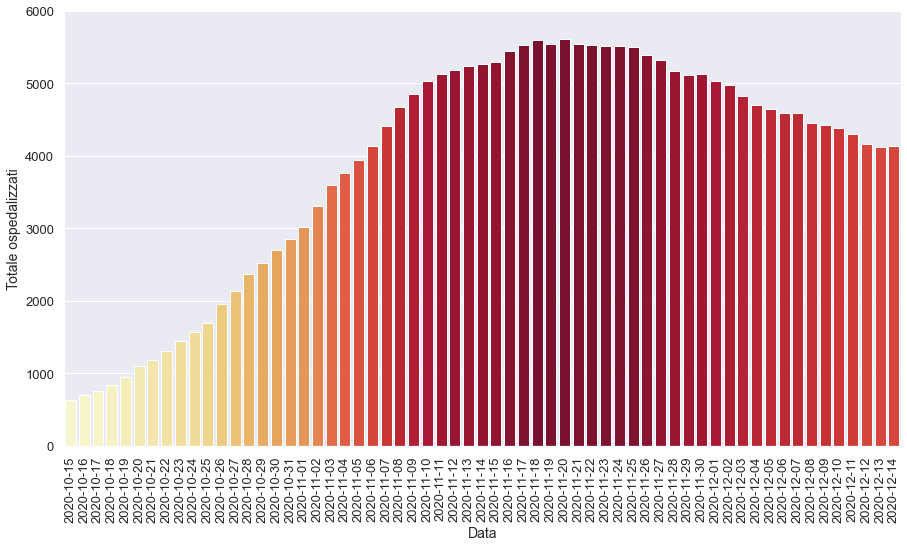

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

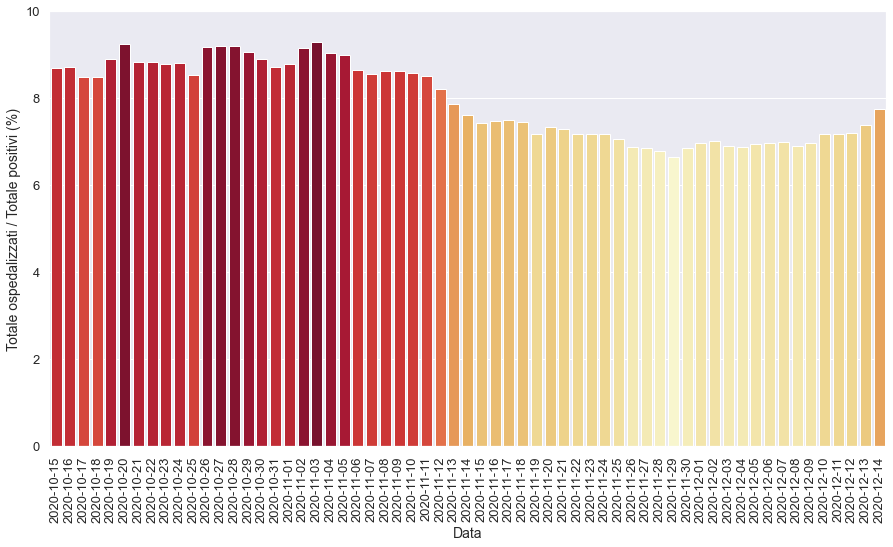

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

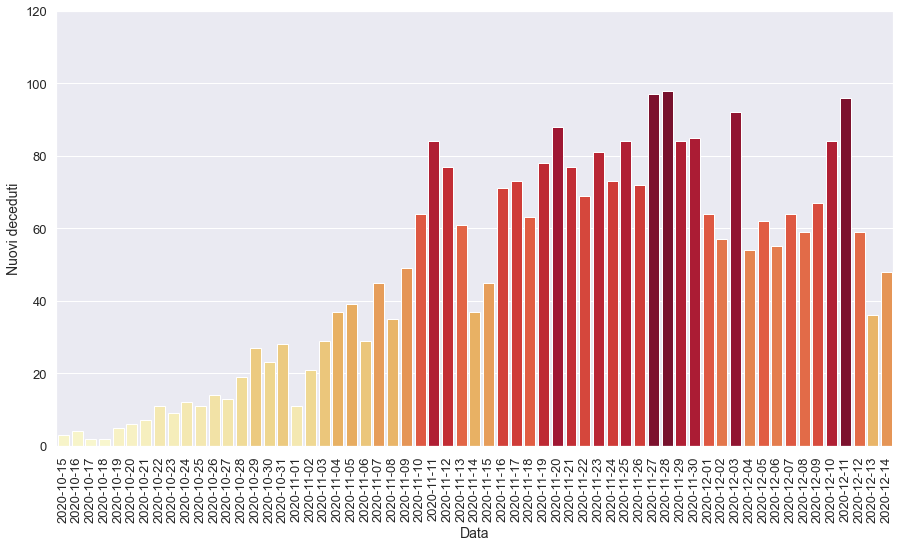

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

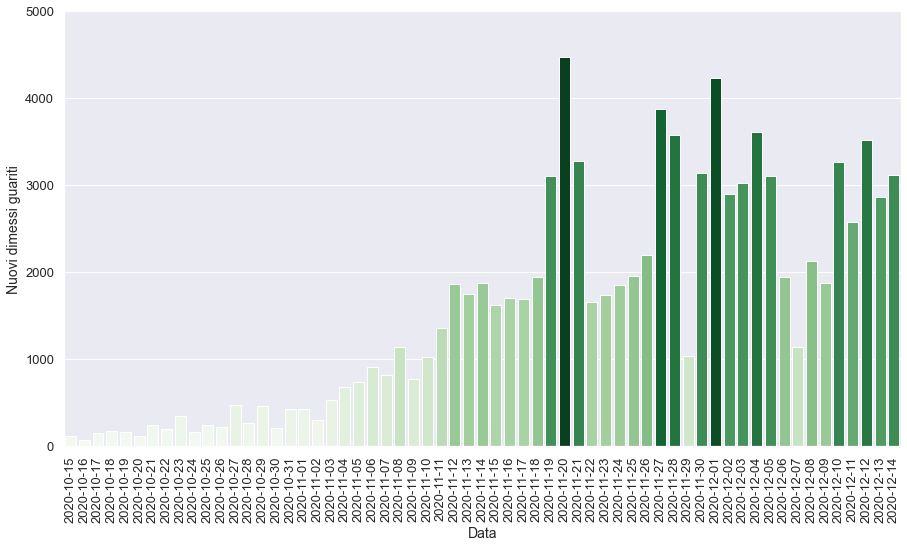

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-14T17:00:00,1,Piemonte,4902,360,5262,63953,69215,2561,4471,...,37.0,19715.0,12523.0,2542.0,6.84,7.60,22.68,35.70,1.98,3.84
1,2020-11-15T17:00:00,1,Piemonte,4921,372,5293,65936,71229,2014,3682,...,45.0,13712.0,8127.0,1983.0,7.03,7.43,26.85,45.31,3.33,2.91
2,2020-11-16T17:00:00,1,Piemonte,5074,378,5452,67488,72940,1711,3476,...,71.0,15902.0,9654.0,1552.0,6.93,7.47,21.86,36.01,1.61,2.40
3,2020-11-17T17:00:00,1,Piemonte,5150,384,5534,68252,73786,846,2606,...,73.0,16131.0,10574.0,764.0,6.94,7.50,16.16,24.65,1.59,1.16
4,2020-11-18T17:00:00,1,Piemonte,5208,388,5596,69468,75064,1278,3281,...,63.0,17755.0,10445.0,1216.0,6.93,7.45,18.48,31.41,1.04,1.73
5,2020-11-19T17:00:00,1,Piemonte,5147,390,5537,71700,77237,2173,5349,...,78.0,41876.0,28547.0,2232.0,7.04,7.17,12.77,18.74,0.52,2.89
6,2020-11-20T17:00:00,1,Piemonte,5225,393,5618,70927,76545,-692,3861,...,88.0,21513.0,9801.0,-773.0,7.00,7.34,17.95,39.39,0.77,-0.90
7,2020-11-21T17:00:00,1,Piemonte,5150,390,5540,70552,76092,-453,2896,...,77.0,18889.0,15496.0,-375.0,7.04,7.28,15.33,18.69,-0.76,-0.59
8,2020-11-22T17:00:00,1,Piemonte,5132,398,5530,71482,77012,920,2641,...,69.0,13605.0,7410.0,930.0,7.20,7.18,19.41,35.64,2.05,1.21
9,2020-11-23T17:00:00,1,Piemonte,5112,399,5511,71412,76923,-89,1730,...,81.0,13529.0,8887.0,-70.0,7.24,7.16,12.79,19.47,0.25,-0.12


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

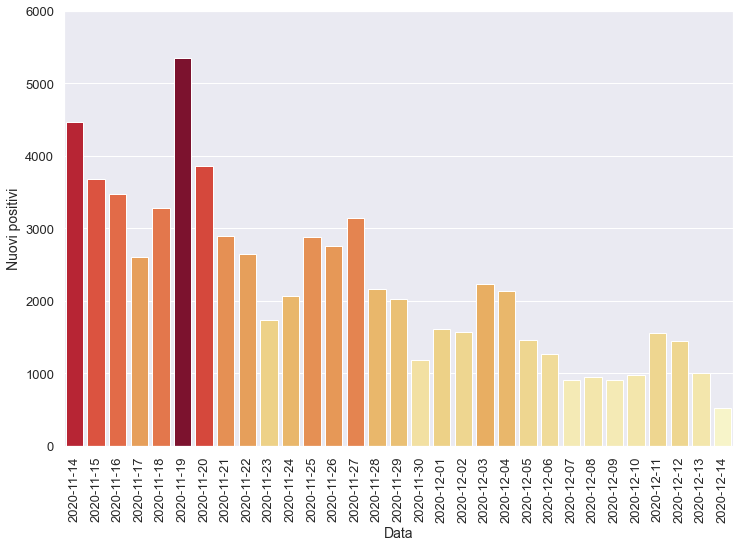

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

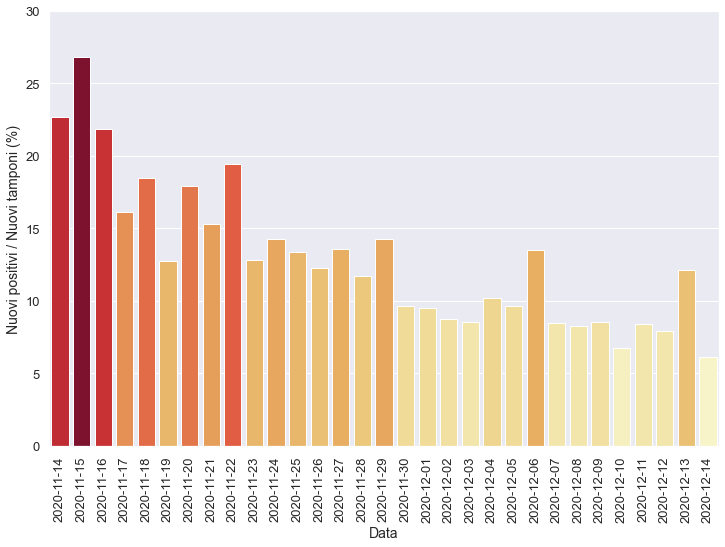

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

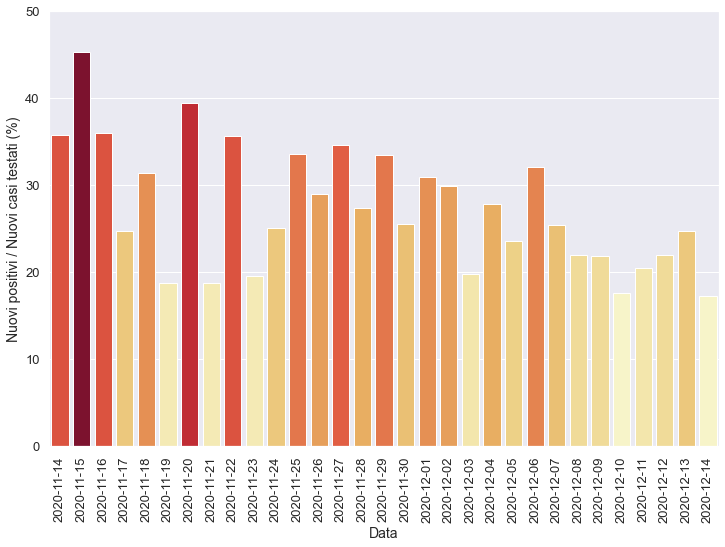

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

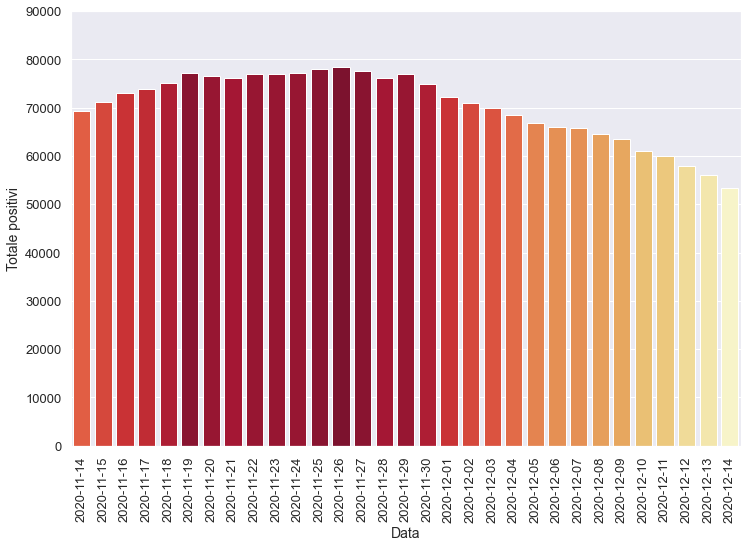

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

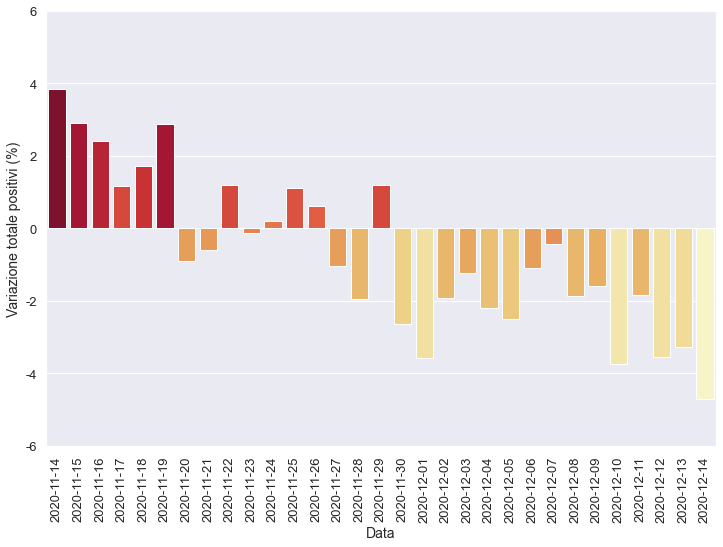

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

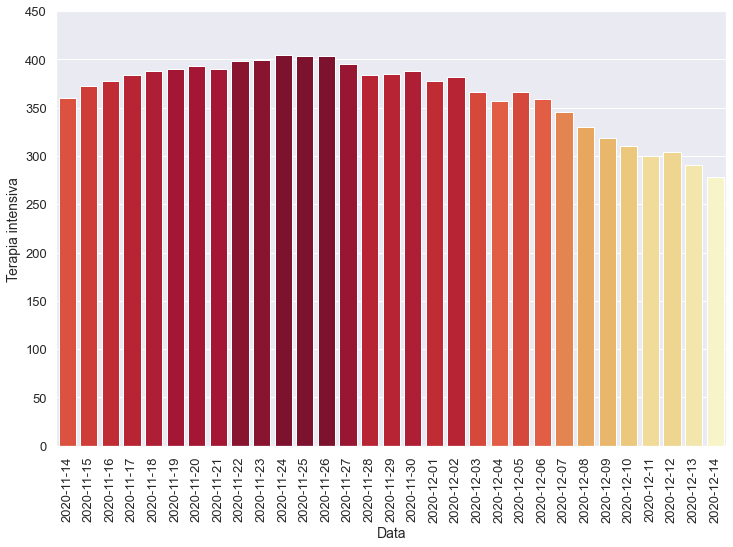

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

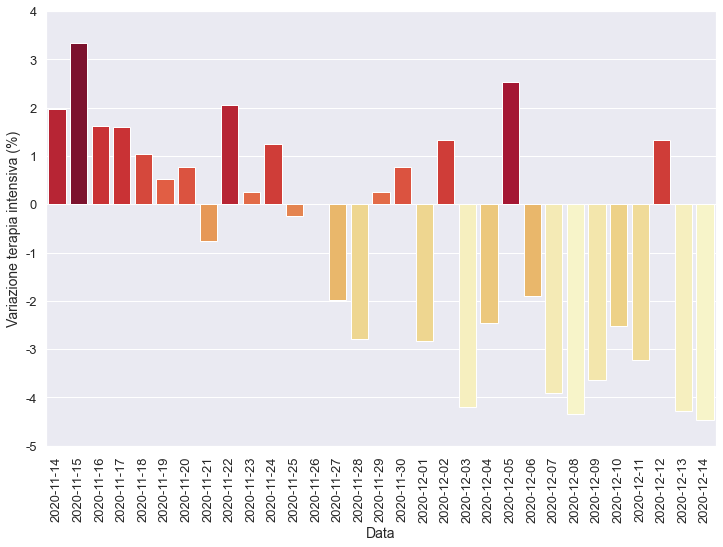

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

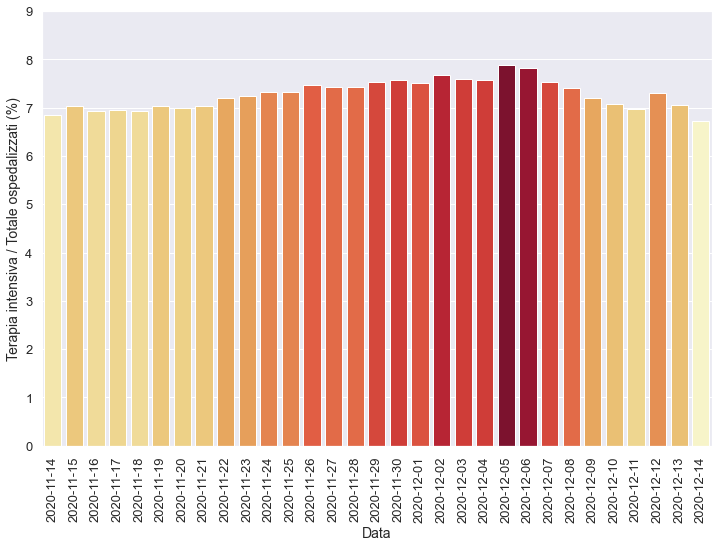

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

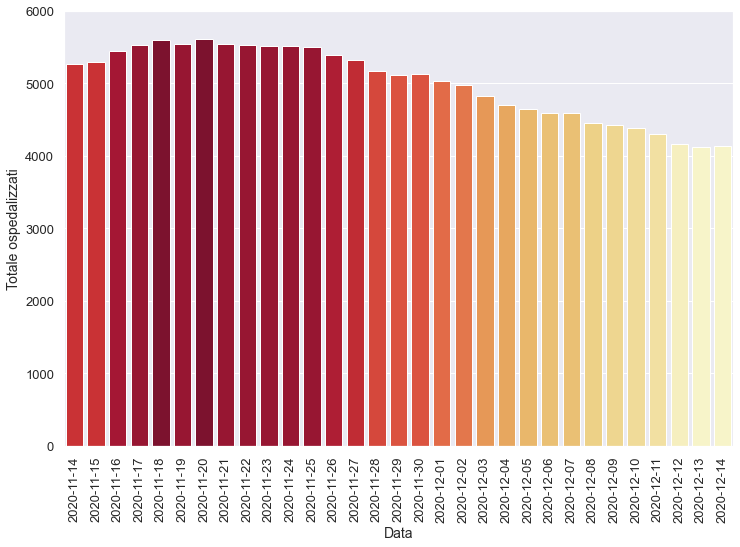

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

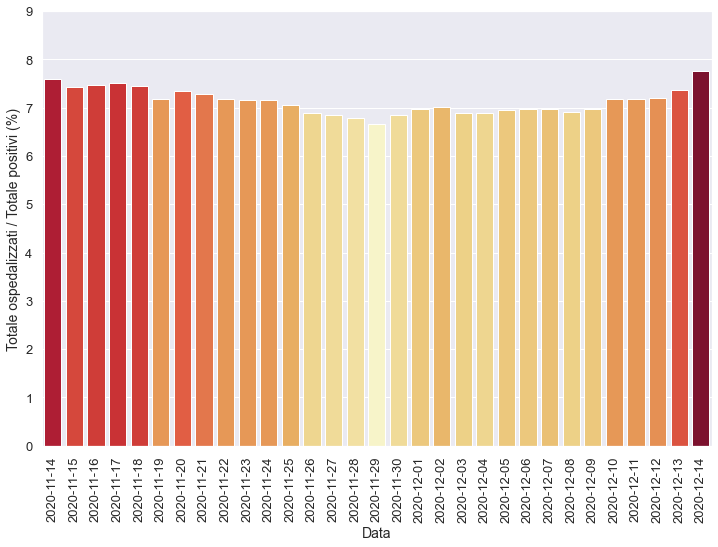

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

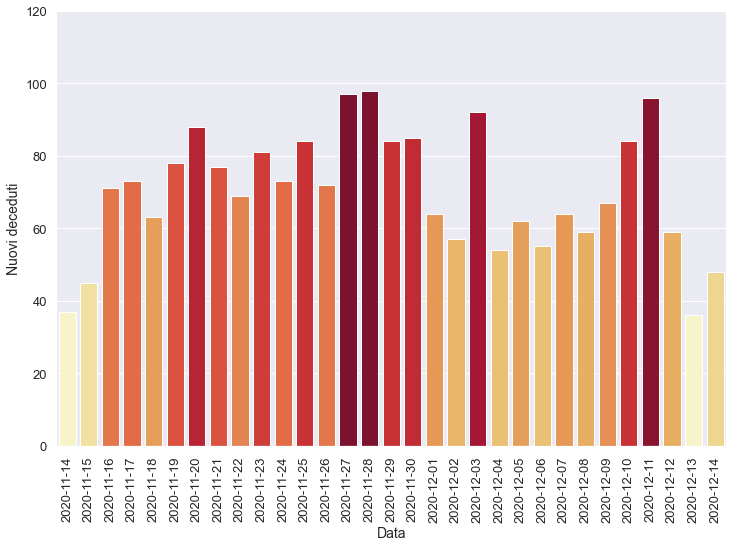

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

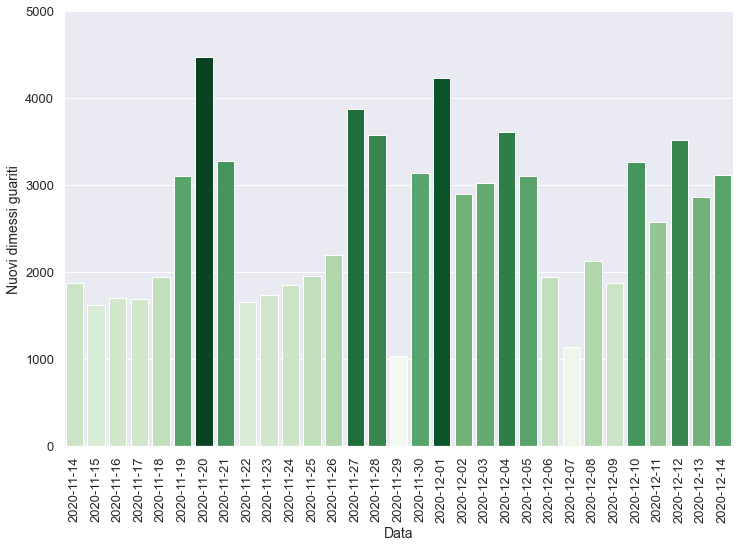

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-07T17:00:00,1,Piemonte,4243,345,4588,61161,65749,-289,911,...,64.0,10752.0,3595.0,-279.0,7.52,6.98,8.47,25.34,-3.90,-0.44
1,2020-12-08T17:00:00,1,Piemonte,4124,330,4454,60059,64513,-1236,952,...,59.0,11514.0,4342.0,-1102.0,7.41,6.90,8.27,21.93,-4.35,-1.88
2,2020-12-09T17:00:00,1,Piemonte,4102,318,4420,59063,63483,-1030,906,...,67.0,10579.0,4153.0,-996.0,7.19,6.96,8.56,21.82,-3.64,-1.60
3,2020-12-10T17:00:00,1,Piemonte,4069,310,4379,56728,61107,-2376,974,...,84.0,14418.0,5560.0,-2335.0,7.08,7.17,6.76,17.52,-2.52,-3.74
4,2020-12-11T17:00:00,1,Piemonte,4005,300,4305,55686,59991,-1116,1553,...,96.0,18504.0,7616.0,-1042.0,6.97,7.18,8.39,20.39,-3.23,-1.83
5,2020-12-12T17:00:00,1,Piemonte,3857,304,4161,53700,57861,-2130,1443,...,59.0,18227.0,6562.0,-1986.0,7.31,7.19,7.92,21.99,1.33,-3.55
6,2020-12-13T17:00:00,1,Piemonte,3835,291,4126,51848,55974,-1887,1011,...,36.0,8330.0,4101.0,-1852.0,7.05,7.37,12.14,24.65,-4.28,-3.26
7,2020-12-14T17:00:00,1,Piemonte,3856,278,4134,49202,53336,-2638,528,...,48.0,8647.0,3056.0,-2646.0,6.72,7.75,6.11,17.28,-4.47,-4.71


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

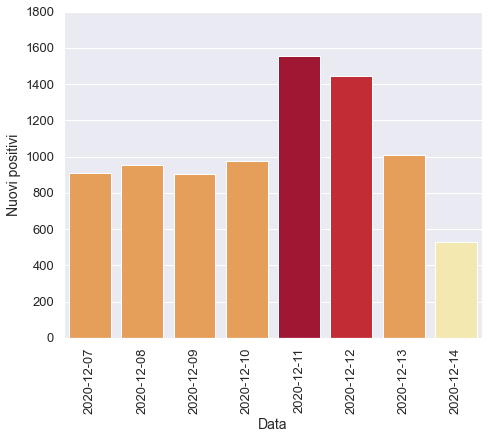

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

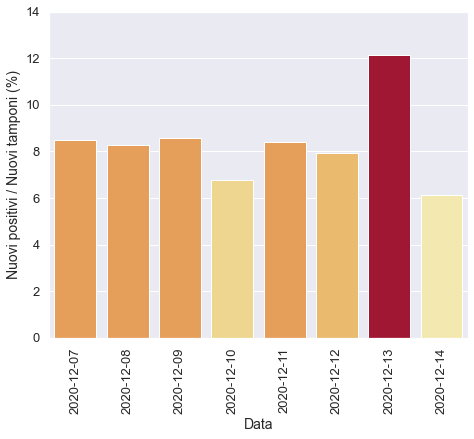

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

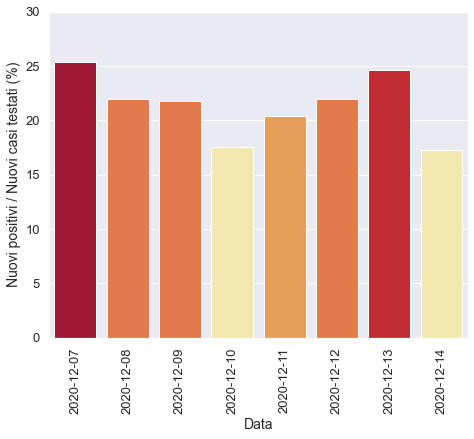

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

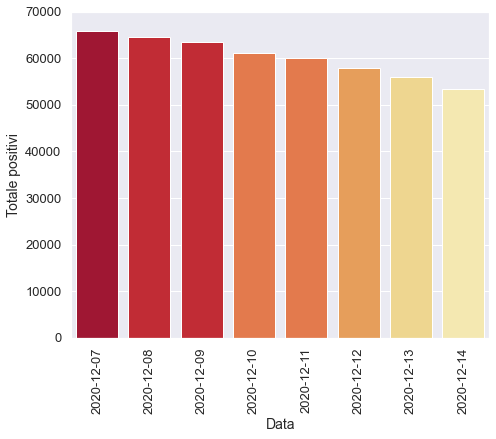

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

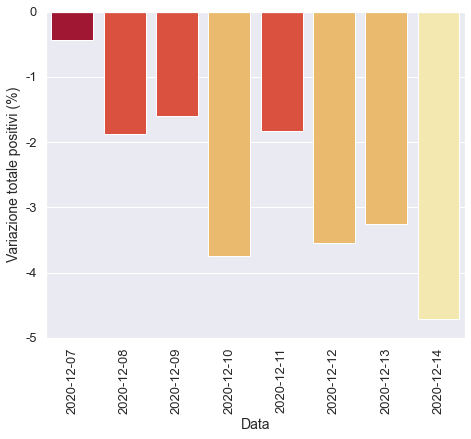

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

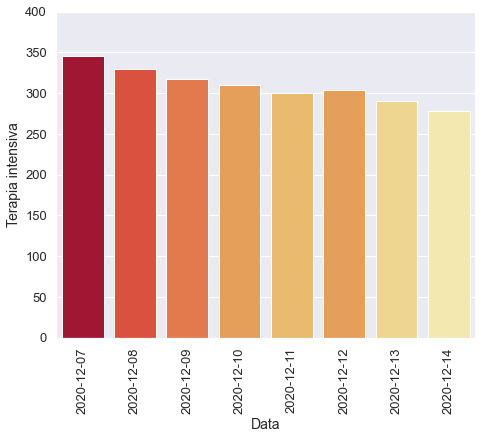

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

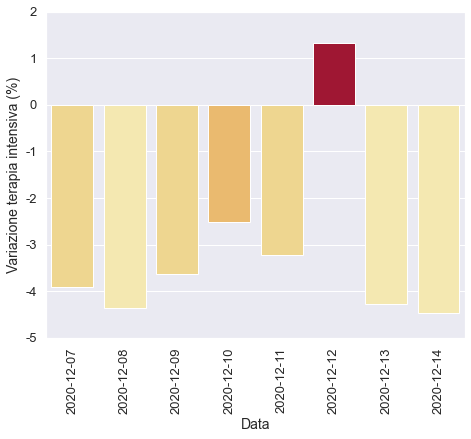

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

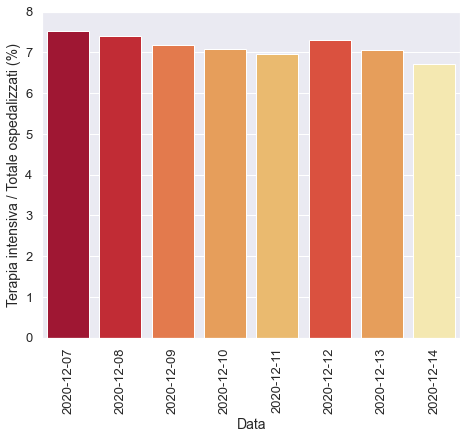

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

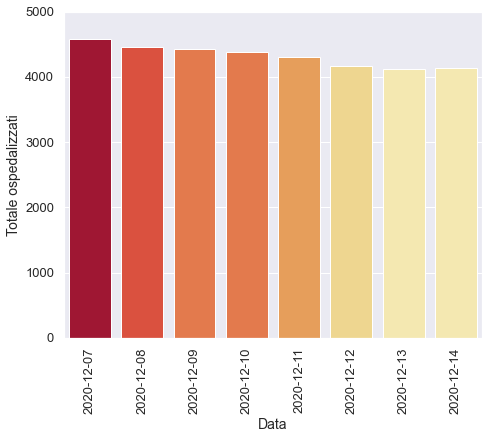

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

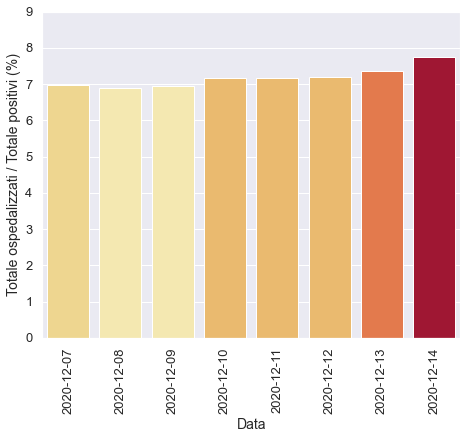

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

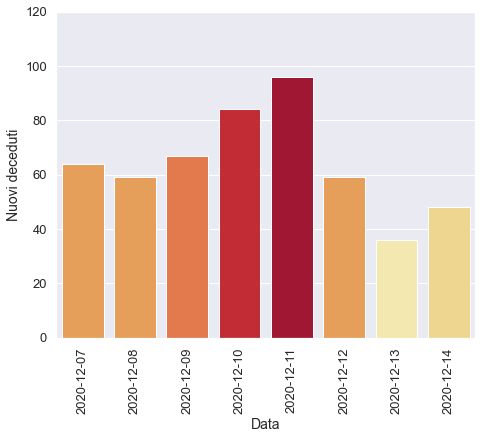

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

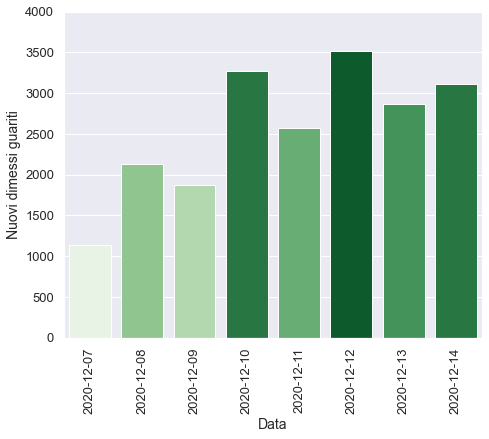

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)